Types of truss bridges:
1. Pratt
2. Howe
3. Warren
Choose a bridge type: 2
Length of the horizontal member(m): 1
Number of members in bottom chord (should be even): 5
Number of members in bottom chord (should be even): 6
Height of bridge(m): 2


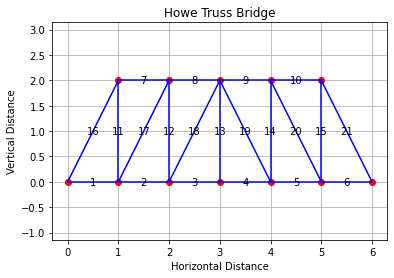

Enter the ILD for which member (type 'q' to exit): 21


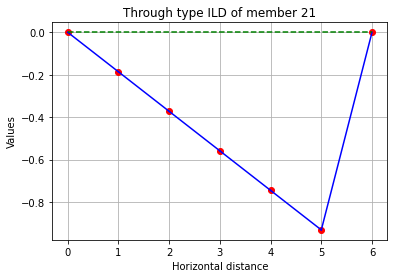

Enter the ILD for which member (type 'q' to exit): 16


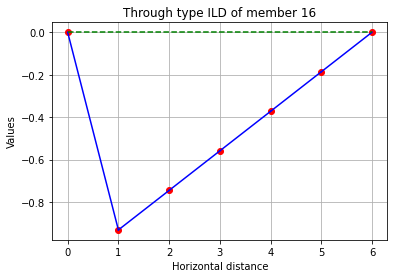

Enter the ILD for which member (type 'q' to exit): 4


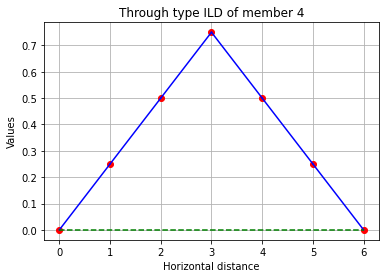

Enter the ILD for which member (type 'q' to exit): 13


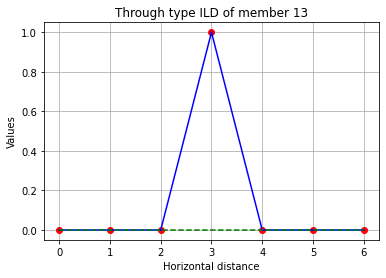

In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np
import os
import bridges
print("Types of truss bridges:")
print("1. Pratt")
print("2. Howe")
print("3. Warren")
user_choice = input("Choose a bridge type: ")
while user_choice not in ["1", "2", "3"]:
    print("Invalid choice. Please choose again.")
    user_choice = input("Choose a bridge type: ")
user_choice = int(user_choice)
if user_choice == 1:
    chosen_option = 1
elif user_choice == 2:
    chosen_option = 2
else:
    chosen_option = 3
    
if chosen_option == 1:
    length = int(input("Length of the horizontal member(m): "))
    n = int(input("Number of members in bottom chord (should be even): "))
    while n % 2 != 0:
        n = int(input("Number of members in bottom chord (should be even): "))
        if n % 2 != 0:
            print("Warning: n should be an even number for a Pratt truss bridge.")
    
    height = int(input("Height of bridge(m): "))

    # Assign coordinates of endpoints [(x1,y1), (x2,y2)] of members to a number (labelling members)
    assign = {}
    bj = [(i * length, 0) for i in range(n + 1)]
    tj = [((i + 1) * length, height) for i in range(n-1)]
    for i in range(n):
        assign[f'{i+1}'] = [(bj[i][0], bj[i][1]), (bj[i + 1][0], bj[i + 1][1])]
    for i in range(n-2):
        assign[f'{i+n+1}'] = [(tj[i][0], tj[i][1]), (tj[i + 1][0], tj[i + 1][1])]
    for i in range(n-1):
        assign[f'{i+2*n-1}'] = [(tj[i][0], tj[0][1]), (bj[i+1][0], bj[i+1][1])]
        if i == 0 or i == n-2:
            assign[f'{i+3*n-2}'] = [(tj[i][0], tj[i][1]), (bj[i][0], bj[i][1])]
            assign[f'{i+3*n-1}'] = [(tj[i][0], tj[0][1]), (bj[i+2][0], bj[i+2][1])]
        elif i < -1+n/2:
            assign[f'{i+3*n-1}'] = [(tj[i][0], tj[0][1]), (bj[i+2][0], bj[i+2][1])]
        elif i > -1+n/2:
            assign[f'{i+3*n-2}'] = [(tj[i][0], tj[0][1]), (bj[i][0], bj[i][1])]
        
    # Get all values of ILD for through type
    import numpy as np
    total_joints = bj+tj
    loading = 1
    C = np.zeros((n+1, 4*n-3))
    for Joint in range(n+1):
        A = np.zeros((4*n,4*n-3))
        B = np.zeros(4*n)
        if Joint == 0:
            B = np.zeros(4*n)
        elif Joint == n:
            B = np.zeros(4*n)
        else:
            B[2*n+Joint] = loading
            B[2*n] = -(n-Joint)*loading/n
            B[3*n] = -(Joint)*loading/n
        for m in range(2*n):
            filtered_data = {k: v for k, v in assign.items() if total_joints[m] in v}
            for k, v in filtered_data.items():
                if v[1] == total_joints[m]:
                    filtered_data[k] = [v[1],v[0]]
            int_keys = [int(key) for key in filtered_data.keys()]
            for i in int_keys:
                A[m,i-1] = filtered_data[f'{i}'][1][0] - filtered_data[f'{i}'][0][0]
                A[2*n+m,i-1] = filtered_data[f'{i}'][1][1] - filtered_data[f'{i}'][0][1]
        # Final solution for force on each member due to applied loading at given joint
        X, residuals, rank, s = np.linalg.lstsq(A, B, rcond=None)
        np.set_printoptions(precision=4, suppress=True)
        for i in range(4*n-3):
            x1,y1 = assign[f'{i+1}'][0]
            x2,y2 = assign[f'{i+1}'][1]
            dx = x2 - x1
            dy = y2 - y1
            distance = math.sqrt(dx**2 + dy**2)
            X[i] = X[i]*distance
        C[Joint] = X
    C_rounded = np.round(C, decimals=4)
    # Plot the ILD
    x = np.zeros(n+1)
    for i in range(n+1):
        x[i] = i*length
    bridges.pratt_m(height, length, n)
    while True:
        user_input = input("Enter the ILD for which member (type 'q' to exit): ")
        if user_input.lower() == "q":
            print("Goodbye!")
            break
        try:
            ILD = int(user_input)
            y = C_rounded[:, ILD - 1]
            plt.plot(x, y, 'ro')
            for k in range(n):
                plt.plot((x[k], x[k + 1]), (y[k], y[k + 1]), 'b-')
            plt.plot((x[0], x[n]), (y[0], y[n]), 'g--')
            plt.xlabel('Horizontal distance')
            plt.ylabel('Values')
            plt.title(f'Through type ILD of member {ILD}')
            plt.grid(True)
          #  plt.axis('equal')
            plt.show()
        except ValueError:
            print("Invalid input. Please enter an integer or type 'q' to exit.")
elif chosen_option == 2:
    length = int(input("Length of the horizontal member(m): "))
    n = int(input("Number of members in bottom chord (should be even): "))
    while n % 2 != 0:
        n = int(input("Number of members in bottom chord (should be even): "))
        if n % 2 != 0:
            print("Warning: n should be an even number for a Pratt truss bridge.")
    
    height = int(input("Height of bridge(m): "))

    # Assign coordinates of endpoints [(x1,y1), (x2,y2)] of members to a number (labelling members)
    assign = {}
    bj = [(i * length, 0) for i in range(n + 1)]
    tj = [((i + 1) * length, height) for i in range(n-1)]
    for i in range(n):
        assign[f'{i+1}'] = [(bj[i][0], bj[i][1]), (bj[i + 1][0], bj[i + 1][1])]
    for i in range(n-2):
        assign[f'{i+n+1}'] = [(tj[i][0], tj[i][1]), (tj[i + 1][0], tj[i + 1][1])]
    for i in range(n-1):
        assign[f'{i+2*n-1}'] = [(tj[i][0], tj[0][1]), (bj[i+1][0], bj[i+1][1])]
    for i in range(int(n/2)):
        assign[f'{i+3*n-2}'] = [(tj[i][0], tj[i][1]), (bj[i][0], bj[i][1])]
    for i in range(int(n/2-1), n-1):
        assign[f'{i+3*n-1}'] = [(tj[i][0], tj[i][1]), (bj[i+2][0], bj[i+2][1])]
        
    # Get all values of ILD for through type
    import numpy as np
    total_joints = bj+tj
    loading = 1
    C = np.zeros((n+1, 4*n-3))
    for Joint in range(n+1):
        A = np.zeros((4*n,4*n-3))
        B = np.zeros(4*n)
        if Joint == 0:
            B = np.zeros(4*n)
        elif Joint == n:
            B = np.zeros(4*n)
        else:
            B[2*n+Joint] = loading
            B[2*n] = -(n-Joint)*loading/n
            B[3*n] = -(Joint)*loading/n
        for m in range(2*n):
            filtered_data = {k: v for k, v in assign.items() if total_joints[m] in v}
            for k, v in filtered_data.items():
                if v[1] == total_joints[m]:
                    filtered_data[k] = [v[1],v[0]]
            int_keys = [int(key) for key in filtered_data.keys()]
            for i in int_keys:
                A[m,i-1] = filtered_data[f'{i}'][1][0] - filtered_data[f'{i}'][0][0]
                A[2*n+m,i-1] = filtered_data[f'{i}'][1][1] - filtered_data[f'{i}'][0][1]
        # Final solution for force on each member due to applied loading at given joint
        X, residuals, rank, s = np.linalg.lstsq(A, B, rcond=None)
        np.set_printoptions(precision=4, suppress=True)
        for i in range(4*n-3):
            x1,y1 = assign[f'{i+1}'][0]
            x2,y2 = assign[f'{i+1}'][1]
            dx = x2 - x1
            dy = y2 - y1
            distance = math.sqrt(dx**2 + dy**2)
            X[i] = X[i]*distance
        C[Joint] = X
    C_rounded = np.round(C, decimals=4)

    # Plot the ILD
    x = np.zeros(n+1)
    for i in range(n+1):
        x[i] = i*length
    bridges.howe(height, length, n)
    while True:
        user_input = input("Enter the ILD for which member (type 'q' to exit): ")
        if user_input.lower() == "q":
            print("Goodbye!")
            break
        try:
            ILD = int(user_input)
            y = C_rounded[:, ILD - 1]
            plt.plot(x, y, 'ro')
            for k in range(n):
                plt.plot((x[k], x[k + 1]), (y[k], y[k + 1]), 'b-')
            plt.plot((x[0], x[n]), (y[0], y[n]), 'g--')
            plt.xlabel('Horizontal distance')
            plt.ylabel('Values')
            plt.title(f'Through type ILD of member {ILD}')
            plt.grid(True)
       #     plt.axis('equal')
            plt.show()
        except ValueError:
            print("Invalid input. Please enter an integer or type 'q' to exit.")
else: 
    # Making ILD for through type
    length = int(input("Length of the horizontal member(m): "))
    n = int(input("Number of members in bottom chord: "))
    height = float(input("Height of bridge(m): "))

    # Assign coordinates of endpoints [(x1,y1), (x2,y2)] of members to a number (labelling members)
    assign = {}
    bj = [(i * length, 0) for i in range(n + 1)]
    tj = [((2*i + 1) * length/2, height) for i in range(n)]
    for i in range(n):
        assign[f'{i+1}'] = [(bj[i][0], bj[i][1]), (bj[i + 1][0], bj[i + 1][1])]
    for i in range(n-1):
        assign[f'{i+n+1}'] = [(tj[i][0], tj[i][1]), (tj[i + 1][0], tj[i + 1][1])]
    for i in range(n):
        assign[f'{i+2*n}'] = [(bj[i][0], bj[i][1]), (tj[i][0], tj[i][1])]
        assign[f'{i+3*n}'] = [(tj[i][0], tj[i][1]), (bj[i+1][0], bj[i+1][1])]
        
    # Get all values of ILD for through type
    import numpy as np
    total_joints = bj+tj
    loading = 1
    C = np.zeros((n+1, 4*n-1))
    for Joint in range(n+1):
        A = np.zeros((4*n+2,4*n-1))
        B = np.zeros(4*n+2)
        if Joint == 0:
            B = np.zeros(4*n+2)
        elif Joint == n:
            B = np.zeros(4*n+2)
        else:
            B[2*n+1+Joint] = loading
            B[2*n+1] = -(n-Joint)*loading/n
            B[3*n+1] = -(Joint)*loading/n
        for m in range(2*n+1):
            filtered_data = {k: v for k, v in assign.items() if total_joints[m] in v}
            for k, v in filtered_data.items():
                if v[1] == total_joints[m]:
                    filtered_data[k] = [v[1],v[0]]
            int_keys = [int(key) for key in filtered_data.keys()]
            for i in int_keys:
                A[m,i-1] = filtered_data[f'{i}'][1][0] - filtered_data[f'{i}'][0][0]
                A[2*n+1+m,i-1] = filtered_data[f'{i}'][1][1] - filtered_data[f'{i}'][0][1]
        # Final solution for force on each member due to applied loading at given joint
        X, residuals, rank, s = np.linalg.lstsq(A, B, rcond=None)
        np.set_printoptions(precision=4, suppress=True)
        for i in range(4*n-1):
            x1,y1 = assign[f'{i+1}'][0]
            x2,y2 = assign[f'{i+1}'][1]
            dx = x2 - x1
            dy = y2 - y1
            distance = math.sqrt(dx**2 + dy**2)
            X[i] = X[i]*distance
        C[Joint] = X
    C_rounded = np.round(C, decimals=4)
    # Plot the ILD
    x = np.zeros(n+1)
    for i in range(n+1):
        x[i] = i*length
    bridges.warren_m(height, length, n)
    while True:
        user_input = input("Enter the ILD for which member (type 'q' to exit): ")
        if user_input.lower() == "q":
            print("Goodbye!")
            break
        try:
            ILD = int(user_input)
            y = C_rounded[:, ILD - 1]
            plt.plot(x, y, 'ro')
            for k in range(n):
                plt.plot((x[k], x[k + 1]), (y[k], y[k + 1]), 'b-')
            plt.plot((x[0], x[n]), (y[0], y[n]), 'g--')
            plt.xlabel('Horizontal distace')
            plt.ylabel('Values')
            plt.title(f'Through type ILD of member {ILD}')
         #   plt.axis('equal')
            plt.grid(True)
            plt.show()
        except ValueError:
            print("Invalid input. Please enter an integer or type 'q' to exit.")
            

In [ ]:
bridges.warren(3,3,6
)